# exp11_시계열 데이터와 시계열 예측

## 1. 들어가며

시계열 예측(Time-Series Prediction)을 다루는 통계적 기법들 중 널리 알려진 ARIMA(Auto-regressive Integrated Moving Average)에 대해 알아보고 이를 토대로 주식 종목의 가격을 예측해본다.

학습 목표
*** 
* 시계열 데이터의 특성과 안정적(Stationary) 시계열의 개념을 이해한다.
* ARIMA 모델을 구성하는 AR, MA, Diffencing의 개념을 이해하고 간단한 시계열 데이터에 적용해 본다.
* 실제 주식 데이터에 ARIMA를 적용해서 예측 정확도를 확인해 본다.

목차
***

시계열 예측이란
* 미래를 예측한다는 것은 가능할까?
* Stationary한 시계열 데이터란?
* 시계열 데이터 사례 분석
* Stationary 여부를 체크하는 통계적 방법

ARIMA 시계열 예측
* 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?
* ARIMA 모델의 개념
* ARIMA 모델 훈련과 추론

## 2. 시계열 예측이란

시계열이란 시간 순서대로 발생한 데이터의 수열

$ Y = { Y_{t} : t \in T }$, where $T$ is the index set

주식처럼 매일의 주식 거래 가격을 `날짜-가격`형태로 모아둔 데이터가 있다면 훌륭한 시계열 데이터가 된다.
이때 날짜가 index 역할을 하게 됨.

특정 주식의 방대한 양의 시계열 데이터가 있다면, 이를 토대로 주식 예측이 가능할까?  
결론은 No.

시계열로 미래의 데이터를 예측하기 위한 전제

1. 과거의 데이터에 일정한 패턴이 발견된다.
2. 과거의 패턴은 미래에도 동일하게 반복될 것 이다.

두 가지 전제가 곧 `안정적(Stationary)` 데이터를 의미하며, 안정적 데이터에 대해서면 예측이 가능하다.

**안정적(Stationary)이다**는 건 **시계열 데이터의 통계적 특성이 변하지 않는다**는 뜻
시계열 데이터를 만들어내는 시간의 변화에 무관하게 일정한 프로세스가 존재한다는 뜻이다.

>Q1. 유가 변화를 예측하는데 위성사진 등 추가적인 데이터를 활용하고 있다면 이것 또한 시계열 데이터 예측에 해당할까요?
>
>A1. 과거의 유가 변동 데이터만을 활용했다면 시계열 데이터 예측이라고 볼 수 있지만, 유가가 아닌 다른 성격의 데이터가 추가로 활용된다면 엄밀한 의미의 시계열 데이터 예측은 아닙니다.

.
>Q2. 유가 변화 예측을 위해 이전의 유가 변화 데이터만 활용하지 않고 다른 데이터를 추가로 활용하는 이유는 무엇일까요?
>
>A2. 유가 예측을 위해 이전 유가만을 활용하는 시계열 데이터 분석은 원유 시장이 외부적인 영향을 받지 않고 자체적으로 유가를 결정하는 안정적인 프로세스가 존재한다는 것을 전제로 합니다.

>말하자면 국제 수요-공급 균형에 기반한 시장원리에 의해 원유시장이 안정적인 평형 상태를 유지한다는 것이지요.

>하지만 국제 유가는 국가 간 분쟁, 경제 호황/불황 등 다양한 외부적 요소에 의해 가격을 결정하는 수요-공급 균형점이 변화하므로,

>외부적 요인을 추가로 고려할 수 있는 보조 데이터의 활용이 정확한 예측에 도움이 됩니다.


시계열 데이터 분석은 완벽한 미래 예측을 보장하지 않는다.  
예측하지 못한 `외부적 변수`에 의해 `안정성(stationarity)`이 훼손될 여지가 있기 때문.  
그럼에도 시계열 데이터 분석은 프로세스 내재적인 시간적 변화를 묘사하는데 아주 훌륭한 성능을 보인다.

## 3. Stationary한 시계열 데이터

A Complete Tutorial on Time Series Modeling in R
https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

현실적으로 다루는 시계열 데이터는 직관적인 안정성의 정의를 만족하는 정도면 충분히 ARIMA 등의 시계열 모델을 통해 분석이 용이하다.

>Q3.안정적인 시계열에서 시간의 추이와 관계없이 일정해야 하는 통계적 특성 세 가지는 무엇인가요?  
>
>A3.
>1. 평균
>2. 분산
>3. 공분산(정확히는 자기공분산-autocovariance)

평균 : 분포의 중간부분을 알아내는 값
분산(Variance) : 분포가 얼마나 퍼져있는지 알아내는 값
공분산(Covariance) : 각 확률변수들이 어떻게 퍼져있는지를 나타내는 것 = X의 편차와 Y의 편차를 곱한것의 평균
상관계수(Correlation) : 확률변수의 절대적 크기에 영향을 받지 않도록 단위화 시킴. = 분산의 크기만큼 나눔
    1. 상관계수의 절대값은 1을 넘을 수 없다
    2. 확률변수 X, Y가 독립이라면 상관계수는 0이다.
    3. X와 Y가 선형적 관계라면 상관계수는 1 혹은 -1 이다.
자기공분산(Autocovariance) : 자기자신과의 공분산. 일정 시차 h 사이를 둔 자기자신과의 공분산
자기상관계수(Autocorrelation)

예시) 직전 5년 치 판매량 X(t-4), X(t-3), X(t-2), X(t-1), X(t)를 가지고 X(t+1)이 얼마일지 예측해보자.

이 예측이 의미가 있으려면 t에 무관하게 이 예측이 적중해야 한다.  
t=2010일 때의 데이터를 가지고 X(2011)을 정확하게 예측하는 모델이라면  
이 모델에 t=2020을 대입해도 x(2021)을 정확하게 예측할 수 있어야 하는 것.

그러려면 t에 무관하게 X(t-4), X(t-3), X(t-2), X(t-1), X(t)의 평균과 분산이 일정 범위 안에 있어야 함.

또한 X(t-h)와 X(t)는 t에 무관하게 h에 대해서만 달라지는 일정한 `상관도`를 가져야 함.


## 4. 시계열 데이터 사례분석

`Daily Minimum Temperatures in Melbourne` 온도 변화를 다루는 시계열

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

print('슝')

슝


In [2]:
dataset_filepath = 'D:/project/aiffel_exp/exp11_Time-Series Prediction/data/daily-min-temperatures.csv'
df = pd.read_csv(dataset_filepath)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


이번에 다룰 시계열이라는 건 결국 시간 컬럼을 index로 하는 series로 표현된다.
read한 csv파일은 Pandas를 통해 2개의 컬럼을 가진 DataFrame으로 변환됐지만 아직 시계열 데이터의 구조는 아니다.

In [3]:
# DataFrame에서 Data 컬럼을 index로 삼아 시계열을 생성
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


DataFrame인 `df`와 Series인 `df['Temp']`는 index 구조가 동일하므로 Numpy, Pandas, Matplotlib 등 많은 라이브러리들이 호환해서 지원해 줍니다.   
하지만 그렇지 않은 경우도 간혹 발생하므로 여기서는 명확하게 Series 객체를 가지고 진행하도록 하겠습니다.

In [4]:
ts1 = df['Temp'] # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

시계열 안정성의 정성적 분석
***

시각화를 통해 안정성(Stationarity) 여부 확인

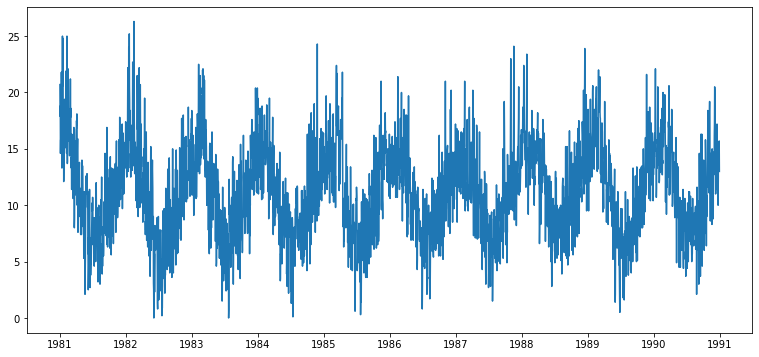

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6 # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.
# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

결측치 확인

In [6]:
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

데이터애 결측치가 있는 경우 통계분석 시 많은 오류를 일으키고 분석 결과에도 악영향을 미친다.
결측치 처리 방법
1. 결측치가 있는 데이터를 모두 삭제(drop)
2. 결측치 양옆의 값들을 이용해서 적절히 보간(interpolate)하여 대입

시간을 index로 가지는 시계열 데이터이므로 삭제보다는 `보간`하는 방법을 선택

Series([], Name: Temp, dtype: float64)


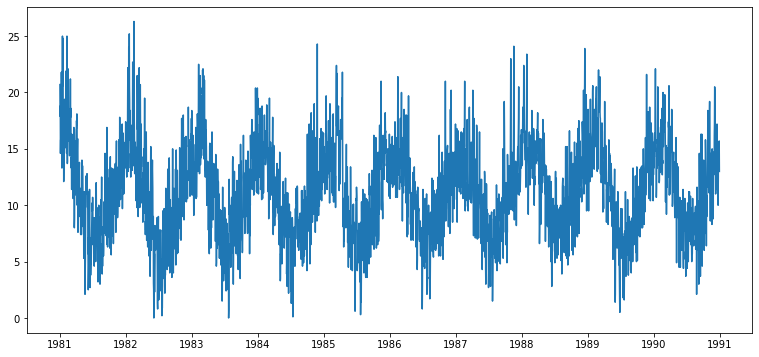

In [7]:
# Pandas에서 결측치 보간을 처리하는 메서드
# 결측치가 있다는 이를 보간합니다. 보간 기준은 time을 선택합니다
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프 확인
plt.plot(ts1)

시계열 데이터의 통계적 특성을 좀 더 명료하게 시각화하기

일정 시간 내 `구간 통계치(Rolling Statistics)`를 시각화하는 함수

현재 `타임 스텝` 부터 `window에 주어진 타임 스텝 이전` 사이

1. 구간의 평균(rolling mean, `이동평균`)과
2. 표준편차(rolling std, `이동표준편차`)를
3. 
원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있을 것입니다.

In [8]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean() # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()   # 이동표준편차 시계열
    
    # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝')

슝


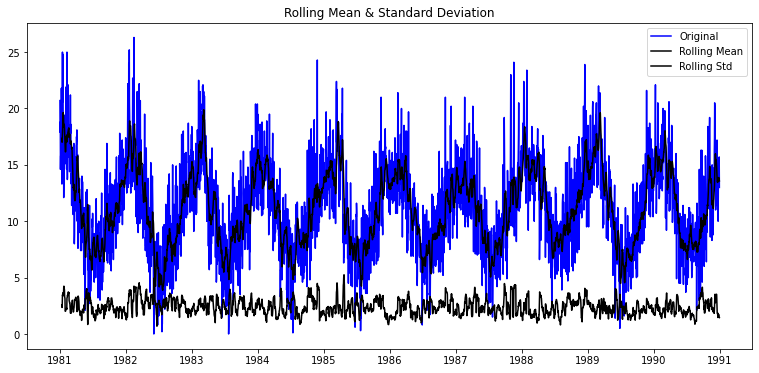

In [9]:
plot_rolling_statistics(ts1, window=12)

이 시계열 데이터가 안정적이라고 명확하게 결론 내릴 수 있는가?  
시각화 결과만 본다면 그렇다고 할 수도 있겠지만, 단정지으려면 좀 더 통계적인 접근이 필요하다.

다른 데이터에 대해서도 비교
***
`International airline passengers`데이터셋 분석

In [10]:
dataset_filepath = 'D:/project/aiffel_exp/exp11_Time-Series Prediction/data/airline-passengers.csv'
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


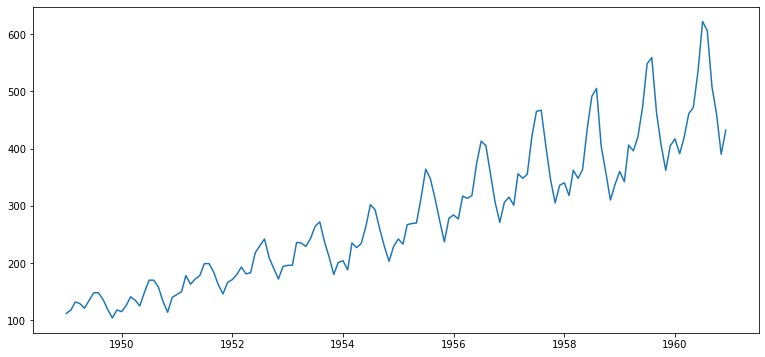

In [11]:
ts2 = df['Passengers']
plt.plot(ts2)

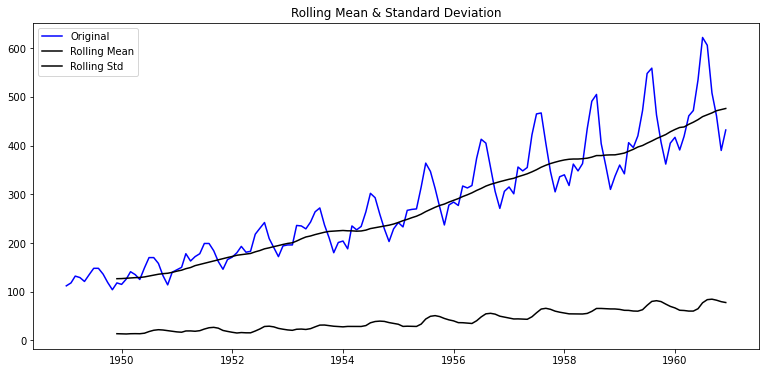

In [12]:
plot_rolling_statistics(ts2, window=12)

이렇게 시간의 추이에 따라 평균과 분산이 증가하는 패턴을 보인다면, 이 시계열 데이터는 안정적이지 않다고 정성적인 결론이 가능하다.
안정적이지 않다면 시계열 예측을 시도하면 안되는가? 
`불안정적(Non-Stationary) 시계열 데이터에 대한 시계열 분석 기법`도 있다.

## 5. Stationary 여부를 체크하는 통계적 방법

**Augmented Dickey-Fuller Test**
***
1. 주어진 시계열 데이터가 안정적이지 않다라는 귀무가설(Null Hypothesis)를 세운 후,
2. 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에
3. 이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택한다

ADF 검정의 귀무가설은 DF 검정과 귀무가설이 같으므로 검정통계량이 Critical Value보다 작거나 p-value가 설정한 유의수준 값보다 작으면 정상적인 시계열 데이터라고 볼 수 있다.

> 가설,검정,p-value
> https://yeomko.tistory.com/37
> 유의확률-위키백과
> https://ko.wikipedia.org/wiki/%EC%9C%A0%EC%9D%98_%ED%99%95%EB%A5%A0


**statsmodels 패키지와 adfuller 메서드**
***
`statsmodels` 패키지에서 제공하는 `adfuller` 메서드를 이용해  
주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드

In [13]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


In [14]:
# 두 시계열(Time Series)에 대한 Augmented Dickey-Fuller Test를 수행
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


ts1(Daily Minimum Temperatures in Melbourne)시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 0에 가깝게 나타남.  

따라서 이 귀무가설은 기각되고, 이 시계열은 안정적 시계열이라는 대립가설이 채택

In [15]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


ts2(International airline passengers) 시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 1에 가깝게 나타남

p-value가 1에 가깝다는 것이 직접적인 증거는 아니지만, **이 귀무가설을 기각할 수는 없게** 되었으므로 **안정적인 시계열**이라고 말할 수 없다.

## 6. Stationary 하게 만들 방법은 없을까?

안정적이지 않은 시계열을 분석하려면 안정적인 시계열로 변경해야한다.

1. 정성적인 분석을 통해 보다 안정적(starionary)인 특성을 가지도록 기존의 시계열 데이터를 가공/변형하는 시도
2. 시계열 분해(Time series decomposition) 기법을 적용



### 6.1 보다 Stationary한 시계열로 가공하기


#### 6.1.1 로그함수 변환

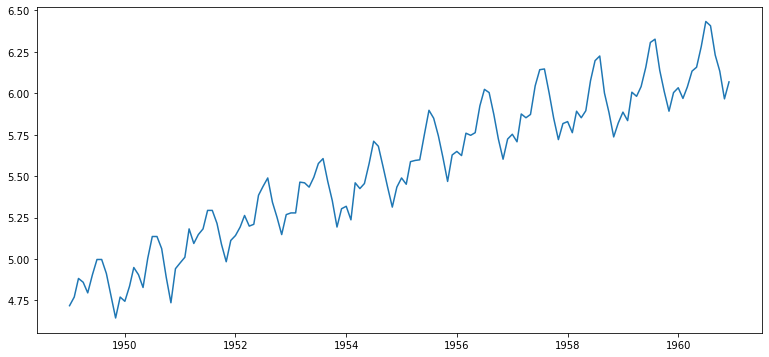

In [16]:
ts_log = np.log(ts2)
plt.plot(ts_log)

In [17]:
# 로그 변환의 효과 확인을 위해 adf test 
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value가 0.42로 절반 이상이나 감소하지만 여전히 가장 큰 문제점은 시간 추이에 따라 평균이 계속 증가한다는 점.

#### 6.1.2 Moving average 제거 - 추세(Trend) 상쇄하기

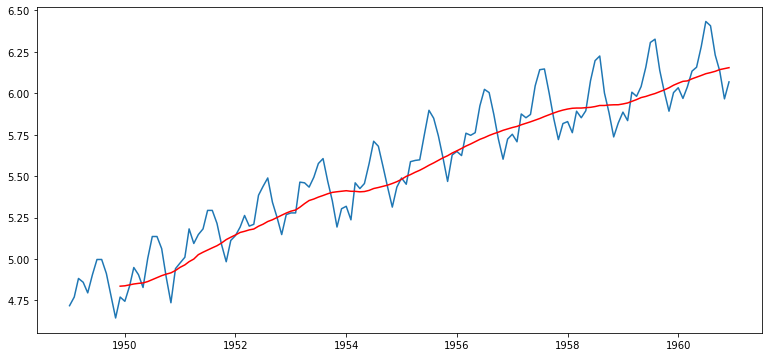

In [18]:
'''
시간 추이에 따라 나타나는 평균값 변화를 제거하기 위해
Moving Average, rolling mean을 구해서 ts_log에서 빼주기
'''
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [19]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

우리가 관심을 가진 ts_log_moving_avg에 거의 도달했습니다. 그런데 문제는 Moving Average 계산 시 (windows size=12인 경우) 앞의 11개의 데이터는 Moving Average가 계산되지 않으므로 ts_log_moving_avg에 결측치(NaN)가 발생한다는 점입니다.
이 결측치들은 향후 Dicky-Fuller Test 시에 에러를 발생시킬 것이므로 이를 데이터셋에서 제거해 줍니다.

In [20]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

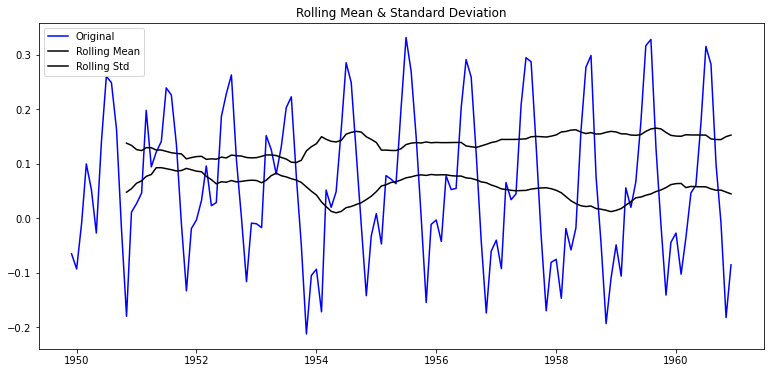

In [21]:
# 이전 스텝에서 정의했던 메서드들을 활용하여 ts_log_moving_avg를 정성, 정량적으로 분석
plot_rolling_statistics(ts_log_moving_avg)

In [22]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


드디어 p-value가 0.02 수준이 되었습니다. 95% 이상의 confidence로 이 time series는 stationary하다고 할 수 있겠습니다.

그러나 지금까지의 접근에서 한 가지 숨겨진 문제점이 있습니다.
바로 Moving Average를 계산하는 window=12로 정확하게 지정해 주어야 한다는 점입니다.

만약 위 코드에서 window=6을 적용하면 어떤 결과가 나올까요?

In [23]:
# window 6 적용
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

슝=3


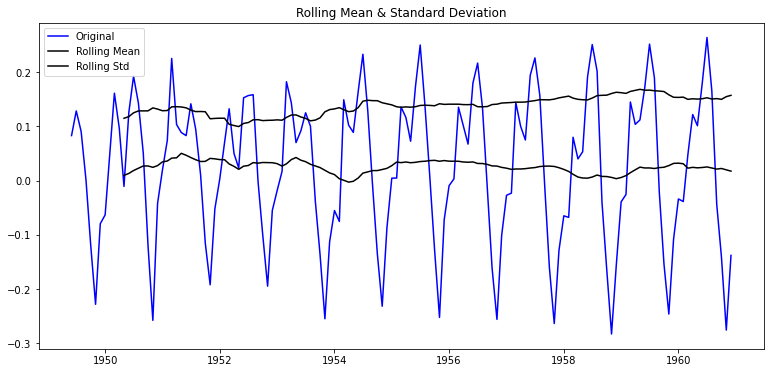

In [24]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [25]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


그래프를 정성적으로 분석해서는 window=12일 때와 별 차이를 느낄 수 없지만 Augmented Dickey-Fuller Test의 결과 p-value는 0.18 수준이어서 아직도 안정적 시계열이라고 말할 수 없게 되었습니다.

이 데이터셋은 월 단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window=12가 적당하다는 것을 추측할 수도 있을 것 같습니다만, moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기를 결정하는 것이 매우 중요하다는 것을 기억해 둡시다.

이제 시간의 추이에 따라 평균이 증가하는 trend를 제거하였습니다. 그러나 여전히 안정적인 시계열이라고 하기에는 마음에 걸리는 부분이 있습니다.

#### 6.1.3 차분(Differencing) - 계절성(Seasonality) 상쇄하기

차분(Differencing)은 이런 패턴을 상쇄하는데 효과적인 방법  
시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법입니다. 이렇게 되면 남은 것은 현재 스텝 값 - 직전 스텝 값이 되어 정확히 이번 스텝에서 발생한 변화량을 의미하게 됩니다. 

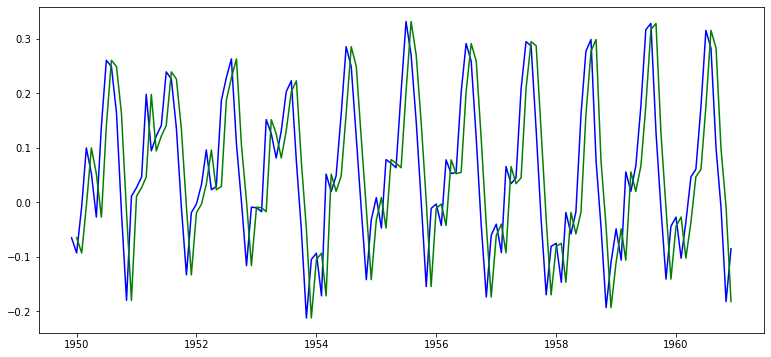

In [26]:
# 시프트한 시계열과 원본 시계열에 대한 그래프
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

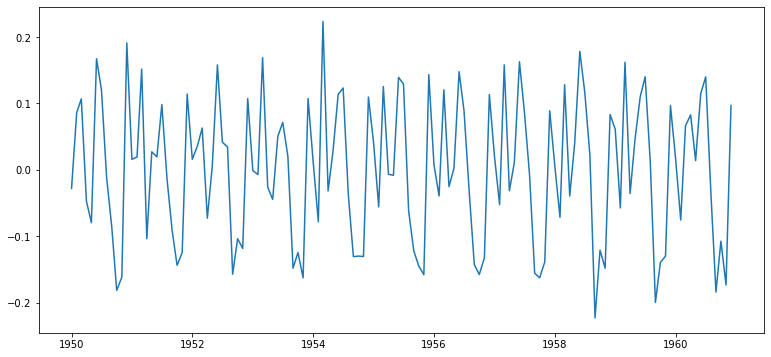

In [27]:
# 원본 시계열에서 시프트한 시계열을 뺀 값을 그래프로 표현
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

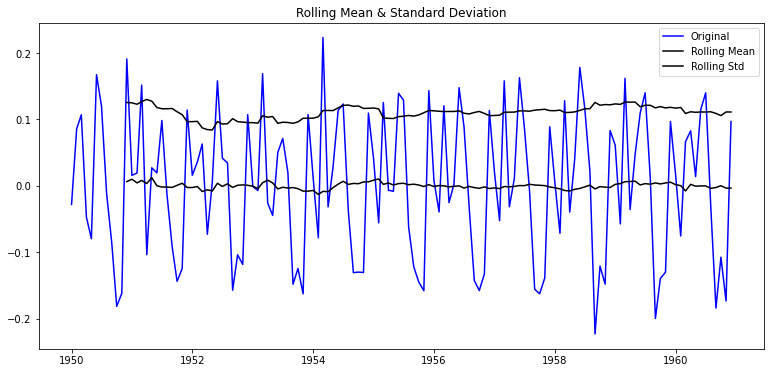

In [28]:
# 이동평균과 이동표준편차를 그래프로 확인하여 정성적 안정성 여부 파악
plot_rolling_statistics(ts_log_moving_avg_diff)

In [29]:
# ADFtest로 차분의 효과 확인
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


이동평균을 빼 주어 추세(Trend)를 제거하고 난 시계열에다가 1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄한 결과, p-value가 약 0.022 에서 0.0019로 1/10 정도로 줄었습니다.

데이터에 따라서는 2차 차분(2nd order differencing, 차분의 차분), 3차 차분(3rd order differencing, 2차 차분의 차분)을 적용하면 더욱 p-value를 낮출 수 있을지도 모릅니다.

### 6.2 시계열 분해(Time series decomposition)

statsmodels 라이브러리 안에는 seasonal_decompose 메서드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있습니다. 이 기능을 활용하면 우리가 위에서 직접 수행했던 moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 됩니다. 이번에는 위에서 구했던 로그 변환 단계(ts_log)에서부터 출발해 봅시다.

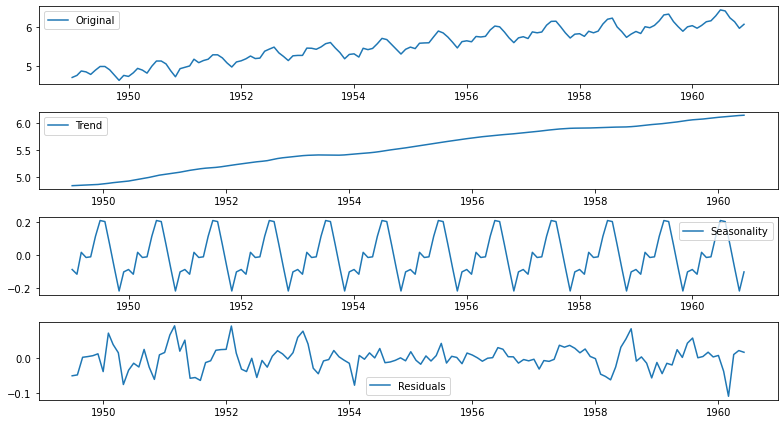

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지를 Residual이라고 합니다. 뒤집어서 말하면 Trend+Seasonality+Residual=Original 이 성립한다는 뜻입니다. 이러한 Decomposing은 시계열 데이터를 이해하는 중요한 관점을 제시해 줍니다.

그렇다면 이제 Residual에 대해 안정성 여부를 따져 봅시다.



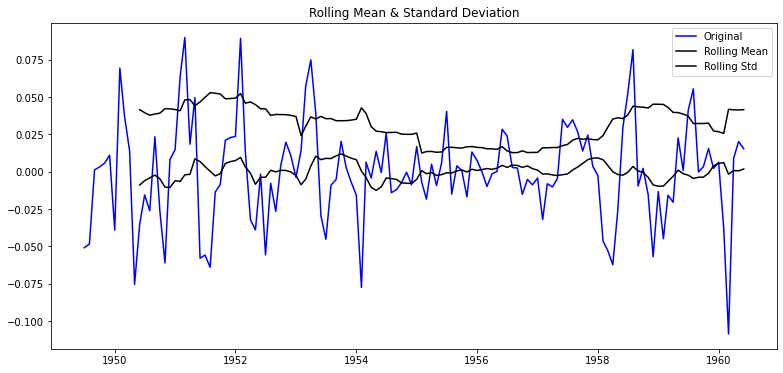

In [31]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [32]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


Decomposing을 통해 얻어진 Residual은 압도적으로 낮은 p-value를 보여 줍니다. 이 정도면 확실히 예측 가능한 수준의 안정적인 시계열이 얻어졌다고 볼 수 있겠습니다. 어쩌면 굳이 애써 직접 Trend, Seasonality를 제거하려고 애쓸 필요가 없이 바로 Time Series Decomposing을 시도하는 게 더 낫지 않았을까요? 물론 그렇긴 합니다만, 이렇게 Trend와 Seasonality를 제거해 주는 것이 어떤 효과를 발휘하게 되는지를 단계적으로 확인하는 과정이었다고 이해해 주시면 좋겠습니다.

## 7. ARIMA 모델의 개념

### 7.1 ARIMA 모델의 정의
***

앞에서 시계열 데이터가 `Trend`와 `Seasonality`, `Residual`로 분해되는 것을 확인했습니다, 또, `Trend`와 `Seasonality`를 잘 분리해 낸 경우 `Residual`이 예측력 있는 안정적인 시계열 데이터가 되는 것을 확인하였습니다.

`ARIMA(Autoregressive Integrated Moving Average)`를 사용하면 이 원리를 이용해 시계열 데이터 예측 모델을 자동으로 만들 수 있습니다.

`ARIMA`는 `AR(Autoregressive)` + `I(Integrated)` + `MA(Moving Average)` 라고 할 수 있는데, 각각의 개념을 살펴보면 지금까지 배운 개념과 닮아 있음을 알게 됩니다.

시계열 데이터 Y = \lbrace Y_t: t ∈ T \rbraceY={Y 
t
​
 :t∈T} 를 생각해 봅시다. Y_tY 
t
​
  를 예측하기 위해서 다음과 같은 모델들을 생각해 볼 수 있습니다.

#### 7.1.1 AR(자기회귀, Autoregressive)

* 과거 값들에 대한 회귀로 미래 값을 예측하는 방법
* $Y_{t}$가 이전 p개의 데이터 $Y_{t-1}, Y_{t-2}, ... Y_{t-p}$의 가중합으로 수렴한다고 보는 모델
* $Y_{t} = ϕ_{0} + ϕ_{1}Y_{t-1} + ϕ_{2}Y_{t-2} + ... ϕ_{p}Y_{t-i}+e_{t}$

    * `AR`은 시계열의 `Residual`에 해당하는 부분을 모델링한다고 볼 수 있습니다.
    * 가중치의 크기가 1보다 작은 $Y_{t-1}, Y_{t-2}, ... Y_{t-p}$의 가중합으로 수렴하는 자기회귀 모델과 안정적 시계열은 통계학적으로 동치입니다.
    * 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 `AR`로 모델링하는 관점이라고 볼 수 있습니다.

#### 7.1.2 MA(이동평균, Moving Average)

* `MA`는 $Y_t$가 이전 q개의 예측오차값 $e_{t-1}, e_{t-2}, ..., e_{t-q}$의 가중합으로 수렴한다고 보는 모델입니다.
* $Y_{t} = μ + e_{t} + θ_{1}e_{t-1} + θ_{2}e_{t-2} + .... + θ_{q}e_{t-q}$

    * `MA`는 시계열의 `Trend`에 해당하는 부분을 모델링한다고 볼 수 있습니다.
    * 예측오차값 $e_{t-1}$이 0보다 크면 모델 예측보다 관측값이 더 높다는 뜻이므로, 다음 $Y_{t}$ 예측 시에는 예측치를 올려잡게 됩니다.
    * 주식값이 최근의 증감 패턴을 지속할 것이라고 보는 관점이 `MA`로 모델링하는 관점이라고 볼 수 있습니다.

#### 7.1.3 I(차분 누적, Integration)

* `I`는 $Y_{t}$이 이전 데이터와 $d$차 차분의 누적(integration) 합이라고 보는 모델입니다.
  * `I`는 시계열의 `Seasonality`에 해당하는 부분을 모델링한다고 볼 수 있습니다.
  * 예를 들어 $ d = 1 $이라면 $Y_{t}$는 $Y_{t-1}$ 과 $ΔY_{t-1}$의 합으로 보는 것


ARIMA는 위 3가지 모델을 모두 한꺼번에 고려합니다. 주식값을 예측하는 우리의 태도와 비슷하지 않나요?

위 그림에서 보듯 어제 주식값이 떨어졌다는 것을 알게 되었을 때,

* '오늘은 주식이 올라서 균형을 맞추겠지?'라는 AR 형태의 기대와
* '어제 떨어졌으니 추세적으로 계속 떨어지지 않을까?'라는 MA 형태의 우려가

동시에 떠오르게 됩니다.

ARIMA는 두 모델 사이에서 적정 수준을 찾아가는 능력을 보여 줍니다.

### 7.2 ARIMA 모델의 모수 p, q, d
***

`ARIMA`를 효과적으로 활용하기 위해서는 `ARIMA`의 모수(parameter)를 잘 설정해야 합니다. 핵심적인 숫자들을 잘 정해야 올바른 예측식을 구할 수 있다는 것이지요.

`ARIMA`의 모수는 아래의 3가지가 있습니다

* `p` : 자기회귀 모형(AR)의 시차
* `d` : 차분 누적(I) 횟수
* `q` : 이동평균 모형(MA)의 시차

이들 중 `p` 와 `q` 는 일반적으로 `p + q < 2`, `p * q = 0` 인 값을 사용하는데, 이는 `p` 나 `q` 중 하나는 0이라는 뜻입니다. 이렇게 하는 이유는 많은 시계열 데이터가 `AR`이나 `MA` 중 하나의 경향만 가지기 때문입니다.

그러면 모수 `p`, `q`, `d`는 어떻게 결정될까요? 여기서부터의 설명이 매우 어렵습니다.

`ARIMA`의 적절한 모수 `p`, `d`, `q`를 선택하는 방법으로 많은 통계학적인 시도들이 있지만 대표적인 것만 이야기하면 `ACF(Autocorrelation Function)`와 `PACF(Partial Autocorrelation Function)`를 말할 수 있습니다. 이 `AutoCorrelation`은 우리가 맨 첫 스텝에서 다룬 개념 중 하나인 자기상관계수와 같은 것입니다.

`ACF`

* 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수
* 주어진 시계열의 현재 값이 과거($y_{t-1}, y_{t-2}, ...., y_{t-n})$값과 어떻게 상관되는지 설명함.
* ACF plot에서 X 축은 상관 계수를 나타냄, y축은 시차 수를 나타냄

`PACF`

* 다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수
* k 이외의 모든 시차를 갖는 관측치($y_{t-1}, y_{t-2}, ...., y_{t-k+1}$)의 영향력을 배제한 가운데 특정 두 관측치, $y_{t}와 y_{t-k}$ 가 얼마나 관련이 있는지 나타내는 척도.

참고자료
자기상관함수 및 편자기상관함수
http://kanggc.iptime.org/em/chap9/chap9.pdf
A Gentle Introduction to Autocorrelation and Partial Autocorrelation
https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

In [ ]:
# statsmodels에서 제공하는 ACF와 PACF 플로팅 기능을 사용
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

아래 그림은 ACF를 통해 MA 모델의 시차 q를 결정하고, PACF를 통해 AR 모델의 시차 p를 결정할 수 있음을 통계학적으로 설명하는 아티클에서 요약 결론 부분만 가져온 것입니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/E-16-4.max-800x600.png)

이 결론에 따라 보자면 `PACF` 그래프를 볼 때 `p=1`이 매우 적합한 것 같습니다. `p`가 2 이상인 구간에서 `PACF`는 거의 0에 가까워지고 있기 때문입니다. `PACF`가 0이라는 의미는 현재 데이터와 `p` 시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 뜻입니다.
반면 `ACF`는 점차적으로 감소하고 있어서 `AR(1)` 모델에 유사한 형태를 보이고 있습니다. `q`에 대해서는 적합한 값이 없어 보입니다. `MA`를 고려할 필요가 없다면 `q=0`으로 둘 수 있습니다. 하지만 `q`를 바꿔 가면서 확인해 보는 것도 좋겠습니다.

`d`를 구하기 위해서는 좀 다른 접근이 필요합니다. `d`차 차분을 구해 보고 이때 시계열이 안정된 상태인지를 확인해 보아야 합니다.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


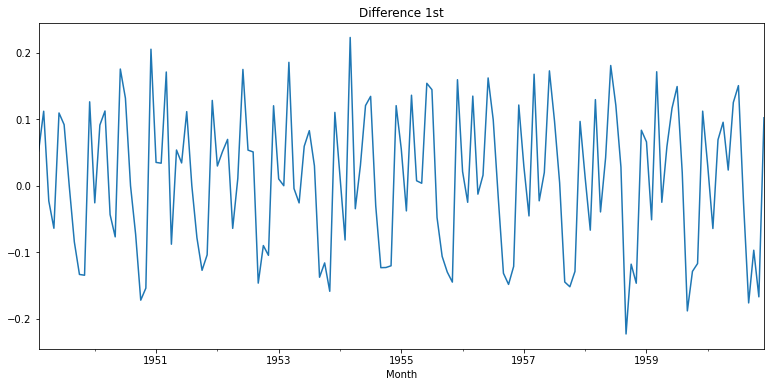

In [33]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


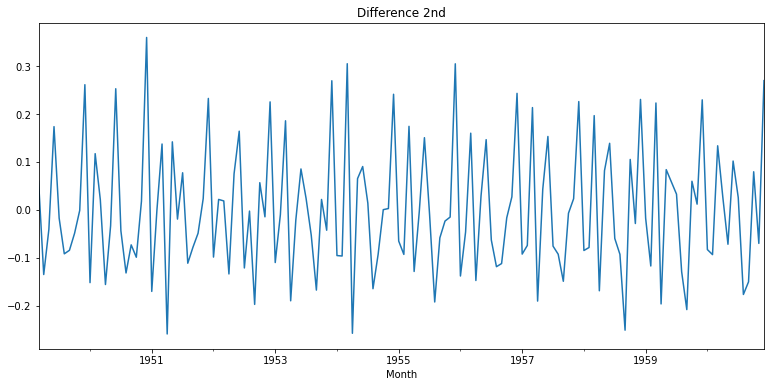

In [34]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

이번 경우에는 1차 차분을 구했을 때 약간 애매한 수준의 안정화 상태를 보였습니다. 2차 차분을 구했을 때는 확실히 안정화 상태였지만 이번 경우에는 `d=1`로 먼저 시도해 볼 수 있을 것 같습니다. `d` 값도 바꿔 가면서 최적의 값을 찾아보기를 권합니다.

### 7.3 학습 데이터 분리
***
아래와 같이 시계열 데이터에서 학습 데이터와 테스트 데이터를 분리해 봅시다. 분리 비율은 학습과 테스트에 9:1로 하겠습니다. 시계열 예측이니만큼 가장 나중 데이터를 테스트용으로 사용하는 것이 타당할 것입니다.

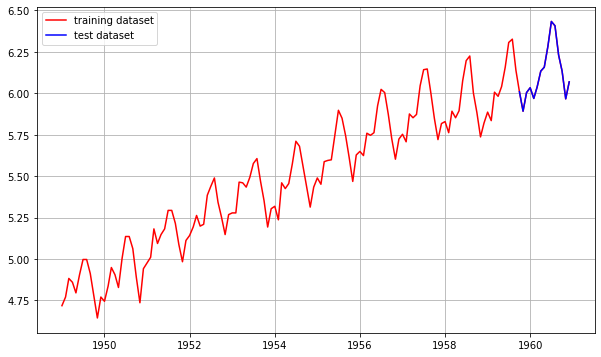

In [35]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [36]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


## 8. ARIMA 모델 훈련과 추론

In [37]:
# 모델 훈련
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.937
Date:                Thu, 17 Feb 2022   AIC                           -409.873
Time:                        12:01:49   BIC                           -367.093
Sample:                    01-01-1949   HQIC                          -392.491
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2746      0.081     -3.391      0.001      -0.433      -0.116
ar.L2         -0.0079      0.109     -0.072      0.942      -0.221       0.206
ar.L3         -0.0030      0.046     -0.066      0.9

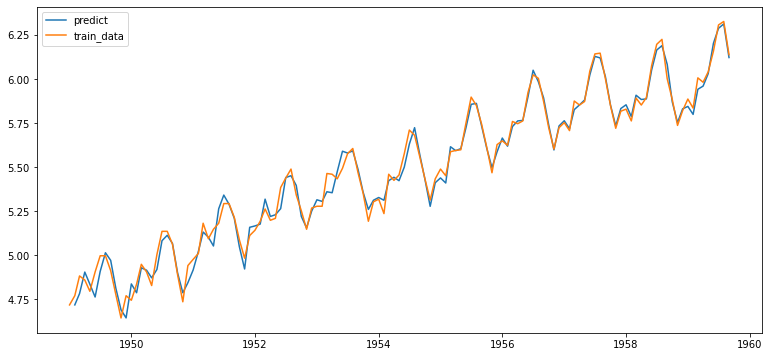

In [38]:
# 훈련결과 시각화
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

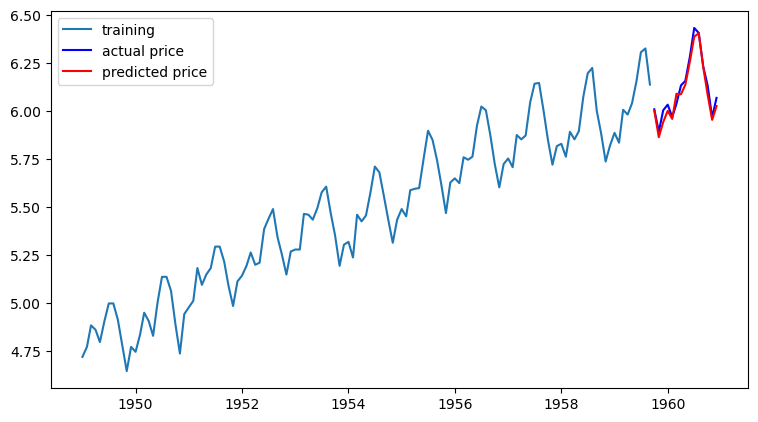

In [39]:
# forecast()메소드를 이용해 테스트 데이터 구간의 데이터를 예측

model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [41]:
'''
시계열 데이터를 로그 변환하여 사용했으므로 다시 지수 변환해야 정확한 오차를 계산할 수 있음
np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산한다.
'''
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  244.22653952675554
MAE:  12.940897367377106
RMSE:  15.627749023028095
MAPE: 2.85%


최종적으로 예측 모델의 메트릭으로 활용하기에 적당한 MAPE 기준으로 10% 정도의 오차율을 보입니다. 썩 만족스럽지 않은데, 더 적당한 모수를 찾을 수 있다면 개선의 여지가 있을지 모르겠습니다. p=14을 줄 경우 MAPE가 2% 정도로 내려갑니다.
조금더 다양한 테스트를 거쳐 최적화된 모델을 만들어 보시면 좋을것 같습니다.